1. First we load the csv files where the positive test and the negative test results are stored for each animal.

In [4]:
import matplotlib.pyplot as plt
import numpy
import csv

# Change the path to csv file appropriately
beaver_positive_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_aug.csv'
beaver_negative_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_neg_aug.csv'

beaver_positive_augmented_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_aug_rotated.csv'
beaver_negative_augmented_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_neg_aug_rotated.csv'



print('Beaver Positive Images Test Results\n')
reader = csv.reader(open(beaver_positive_csv,"rt"))
temp = list(reader)
positive_data = numpy.array(temp).astype('float').flatten()
positive_length = len(positive_data)
        
print('\nBeaver positive test samples count: {}'.format(positive_length))        

print('\n\nBeaver Negative Images Test Results\n')
reader = csv.reader(open(beaver_negative_csv,"rt"))
temp = list(reader)
negative_data = numpy.array(temp).astype('float').flatten()
negative_length = len(negative_data)
        
print('\nBeaver negative test samples count: {}'.format(negative_length))

# Augmented data
print('Beaver Positive Augmented Images Test Results\n')
reader = csv.reader(open(beaver_positive_augmented_csv,"rt"))
temp = list(reader)
positive_augmented_data = numpy.array(temp).astype('float').flatten()
positive_augmented_length = len(positive_augmented_data)
        
print('\nBeaver positive test Augmented samples count: {}'.format(positive_length))        

print('\n\nBeaver Negative Augmented Images Test Results\n')
reader = csv.reader(open(beaver_negative_augmented_csv,"rt"))
temp = list(reader)
negative_augmented_data = numpy.array(temp).astype('float').flatten()
negative_augmented_length = len(negative_augmented_data)
        
print('\nBeaver negative test Augmented samples count: {}'.format(negative_length))

Beaver Positive Images Test Results


Beaver positive test samples count: 100


Beaver Negative Images Test Results


Beaver negative test samples count: 500
Beaver Positive Augmented Images Test Results


Beaver positive test Augmented samples count: 100


Beaver Negative Augmented Images Test Results


Beaver negative test Augmented samples count: 500


2. Now we need to define the threshold points over which the ROC will be plotted.

In [12]:
# Here we are defining preset threshold levels for which TPR and FPR values will be calculated
thresholds = numpy.arange(0.0,1.0,0.005)
print('Thresholds: {}'.format(thresholds))

Thresholds: [ 0.     0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045
  0.05   0.055  0.06   0.065  0.07   0.075  0.08   0.085  0.09   0.095  0.1
  0.105  0.11   0.115  0.12   0.125  0.13   0.135  0.14   0.145  0.15
  0.155  0.16   0.165  0.17   0.175  0.18   0.185  0.19   0.195  0.2    0.205
  0.21   0.215  0.22   0.225  0.23   0.235  0.24   0.245  0.25   0.255
  0.26   0.265  0.27   0.275  0.28   0.285  0.29   0.295  0.3    0.305
  0.31   0.315  0.32   0.325  0.33   0.335  0.34   0.345  0.35   0.355
  0.36   0.365  0.37   0.375  0.38   0.385  0.39   0.395  0.4    0.405
  0.41   0.415  0.42   0.425  0.43   0.435  0.44   0.445  0.45   0.455
  0.46   0.465  0.47   0.475  0.48   0.485  0.49   0.495  0.5    0.505
  0.51   0.515  0.52   0.525  0.53   0.535  0.54   0.545  0.55   0.555
  0.56   0.565  0.57   0.575  0.58   0.585  0.59   0.595  0.6    0.605
  0.61   0.615  0.62   0.625  0.63   0.635  0.64   0.645  0.65   0.655
  0.66   0.665  0.67   0.675  0.68   0.685  0.69   0.6

    Now calculating TPR and FNR for the first positive test



PLOTTING ROC


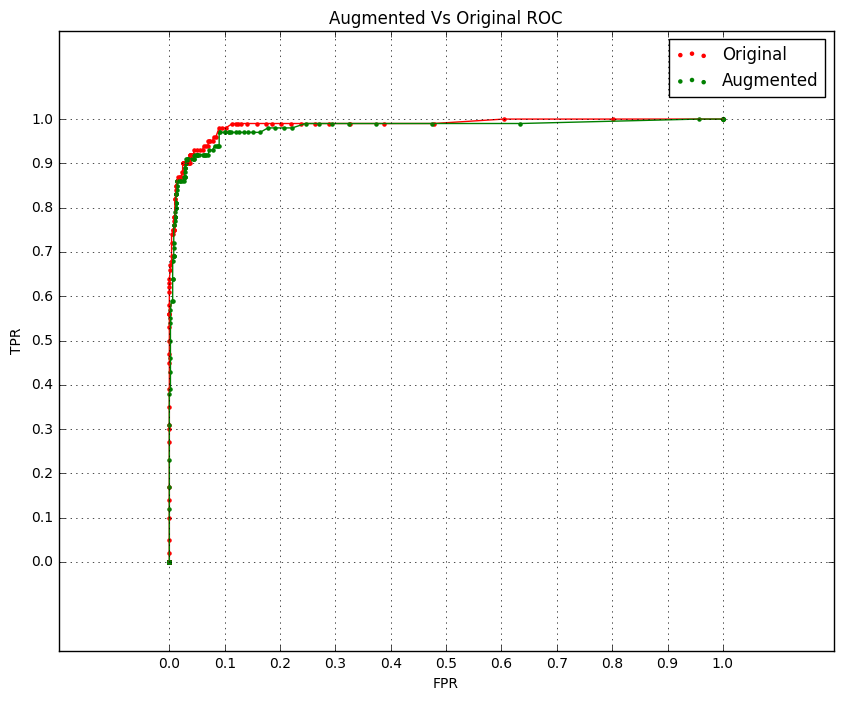

In [14]:
import pylab

TPRs = [None] * len(thresholds)
FPRs = [None] * len(thresholds)

TPRs_aug = [None] * len(thresholds)
FPRs_aug = [None] * len(thresholds)

for i in range(0, len(thresholds)):
    test_positive = positive_data[positive_data >= thresholds[i]]
    tpr = len(test_positive) / len(positive_data)
    TPRs[i] = tpr # This is the calculated TPR value for threshold level i in sample j 
        
    test_negative = negative_data[negative_data >= thresholds[i]]
    fpr = len(test_negative) / len(negative_data)
    FPRs[i] = fpr # This is the calculated FPR value for threshold level i in sample j
    
    test_positive_aug = positive_augmented_data[positive_augmented_data >= thresholds[i]]
    tpr_a = len(test_positive_aug) / len(positive_augmented_data)
    TPRs_aug[i] = tpr_a # This is the calculated TPR value for threshold level i in sample j 
        
    test_negative_aug = negative_augmented_data[negative_augmented_data >= thresholds[i]]
    fpr_a = len(test_negative_aug) / len(negative_augmented_data)
    FPRs_aug[i] = fpr_a # This is the calculated FPR value for threshold level i in sample j

print('\n\nPLOTTING ROC')
fig = plt.figure(figsize=(10,8))
p1 = plt.scatter(FPRs, TPRs, color='red', s=5)
plt.plot(FPRs, TPRs, color='red')
p2 = plt.scatter(FPRs_aug, TPRs_aug, color='green', s=5)
plt.plot(FPRs_aug, TPRs_aug, color='green')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.legend((p1, p2), ('Original', 'Augmented'))
plt.grid()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Augmented Vs Original ROC')
pylab.savefig('Rotation_augmetended_ROC.png')
plt.show()

# Comparison with sift matching scores.

In [7]:
beaver_sift_positive_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_sift_positive.csv'
beaver_sift_negative_csv = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/DataSets/OUTPUTS/Beaver_sift_negative.csv'

print('Beaver Positive Images Test Results\n')
reader = csv.reader(open(beaver_sift_positive_csv,"rt"))
temp = list(reader)
positive_sift_data = numpy.array(temp).astype('float').flatten()
positive_sift_length = len(positive_sift_data)
        
print('\nBeaver positive test samples count: {}'.format(positive_sift_length))        

print('\n\nBeaver Negative Images Test Results\n')
reader = csv.reader(open(beaver_sift_negative_csv,"rt"))
temp = list(reader)
negative_sift_data = numpy.array(temp).astype('float').flatten()
negative_sift_length = len(negative_sift_data)
        
print('\nBeaver negative test samples count: {}'.format(negative_sift_length))

Beaver Positive Images Test Results


Beaver positive test samples count: 400


Beaver Negative Images Test Results


Beaver negative test samples count: 400




PLOTTING ROC


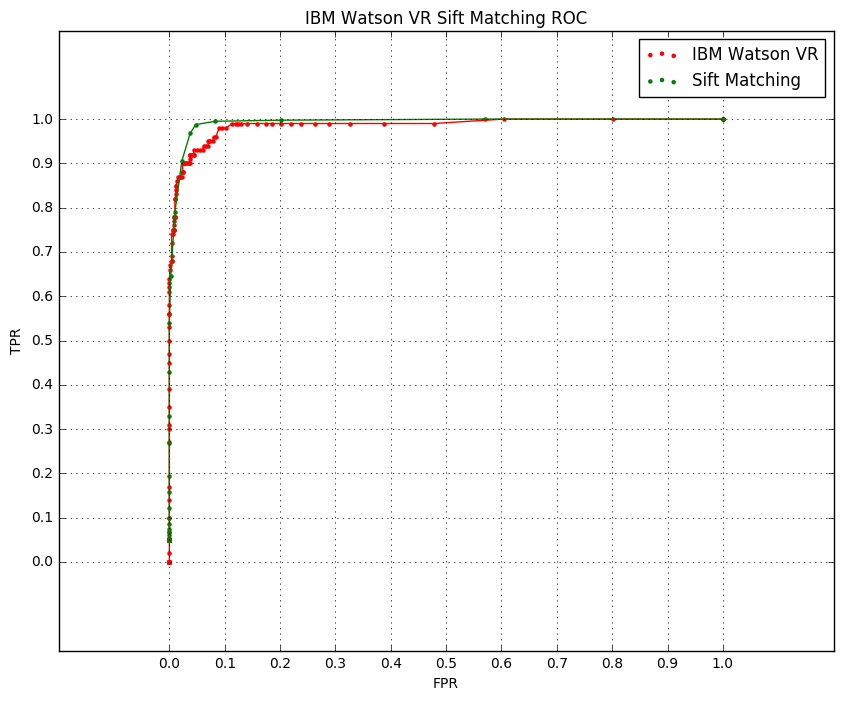

In [15]:
TPRs_sift = [None] * len(thresholds)
FPRs_sift = [None] * len(thresholds)

for i in range(0, len(thresholds)):
    test_positive = positive_sift_data[positive_sift_data >= thresholds[i]]
    tpr = len(test_positive) / len(positive_sift_data)
    TPRs_sift[i] = tpr # This is the calculated TPR value for threshold level i in sample j 
        
    test_negative = negative_sift_data[negative_sift_data >= thresholds[i]]
    fpr = len(test_negative) / len(negative_sift_data)
    FPRs_sift[i] = fpr # This is the calculated FPR value for threshold level i in sample j
    
print('\n\nPLOTTING ROC')
fig = plt.figure(figsize=(10,8))
p1 = plt.scatter(FPRs, TPRs, color='red', s=5)
plt.plot(FPRs, TPRs, color='red')
p2 = plt.scatter(FPRs_sift, TPRs_sift, color='green', s=5)
plt.plot(FPRs_sift, TPRs_sift, color='green')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.legend((p1, p2), ('IBM Watson VR', 'Sift Matching'))
plt.grid()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('IBM Watson VR Sift Matching ROC')
pylab.savefig('Sift_Vs_IBM_VR.png')
plt.show()